<a href="https://colab.research.google.com/github/taslimmuhammed/pytorch/blob/main/pytorch_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from torch import nn # nn contains all building blocks of neural network

In [7]:
def plot_data(X_train, y_train, X_test, y_test, predictions=None):
  plt.figure(figsize=(13,7))
  plt.scatter(X_train, y_train, c="b", s=4, label="Training Data")
  plt.scatter(X_test, y_test, c="r", s=10, label="Testing Data")
  if predictions!=None:
    plt.scatter(X_test, predictions, c="g", s=10, label="Predictions")
  plt.legend()
  plt.show()

# Creating a linear regression model

In [8]:
class LinearRegresssionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.wieghts = nn.Parameter(torch.randn(1,#-> start with random wieghts
                                            requires_grad=True, #-> can this paramter be adjusted using gradient decent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.wieghts* x+ self.bias

In [9]:
torch.manual_seed(43) # for having the same value in each learning
model_0 = LinearRegresssionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('wieghts', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

In [11]:
X = torch.arange(1,101).unsqueeze(dim=1)
y= X*6-9
X[0:5],y[0:5]

(tensor([[1],
         [2],
         [3],
         [4],
         [5]]),
 tensor([[-3],
         [ 3],
         [ 9],
         [15],
         [21]]))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape

torch.Size([80, 1])

In [13]:
y_pred = model_0(X_test)
y_pred

tensor([[-30.5323],
        [ -9.1351],
        [-14.9707],
        [-65.5460],
        [-22.1031],
        [-52.5779],
        [-42.2035],
        [-39.6099],
        [-16.2675],
        [-29.2355],
        [ -3.2994],
        [-61.0071],
        [-15.6191],
        [-31.1807],
        [-19.5095],
        [ -7.1899],
        [-35.0711],
        [-13.0255],
        [ -5.2446],
        [-38.3131]], grad_fn=<AddBackward0>)

In [14]:
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[-30.5323],
        [ -9.1351],
        [-14.9707],
        [-65.5460],
        [-22.1031],
        [-52.5779],
        [-42.2035],
        [-39.6099],
        [-16.2675],
        [-29.2355],
        [ -3.2994],
        [-61.0071],
        [-15.6191],
        [-31.1807],
        [-19.5095],
        [ -7.1899],
        [-35.0711],
        [-13.0255],
        [ -5.2446],
        [-38.3131]])

**you can see that the grad term at the end of previous result is missing here, The inference mode is exclusively for predicting purpose and it disables the auto_grad part**

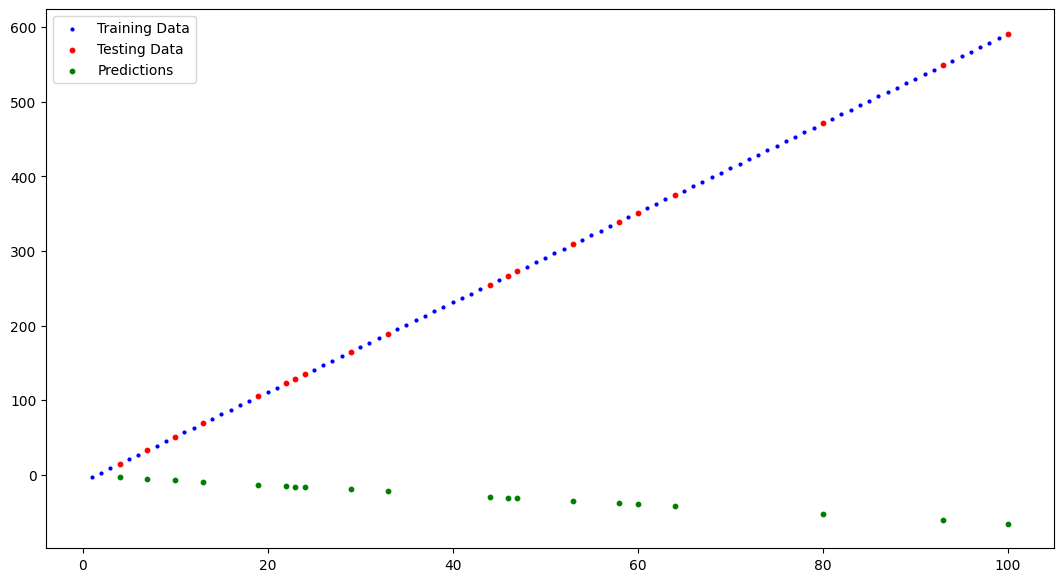

In [15]:
plot_data(X_train,y_train,X_test,y_test,y_pred)

In [16]:
loss_fn = nn.L1Loss() # mean absolute error
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01, ) #SGD- sotchastic gradient decent

# Training Model
1. model_0.eval() - turn on evaluating mode for model, turn off diff settings required for traning
2. model_0.train() - turn on training mode
3. model_0.inference_mode()/model_0.no_grad() - turn off auto grad, only this result can be used for plotting

In [17]:
epochs = 10000
epoch_arr = []
train_cost = []
test_cost = []
for epoch in range(epochs):
  # training model
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() #starting optimzer fresh, by defualt it'll accumilate previous results
  loss.backward()
  optimizer.step()

  # noting loss, for testing and graphing purpouses only
  if epoch%1000==0:
    print(loss)
    print(model_0.state_dict())
    with torch.inference_mode():
      model_0.eval()
      epoch_arr.append(epoch)
      train_cost.append(loss)
      y_pred_test = model_0(X_test)
      test_loss = loss_fn(y_pred_test,y_test)
      test_cost.append(test_loss)


tensor(342.5332, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([-0.1210])), ('bias', tensor([-0.6961]))])
tensor(16.5162, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0731])), ('bias', tensor([-1.8148]))])
tensor(19.0074, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0506])), ('bias', tensor([-2.8596]))])
tensor(20.9499, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0327])), ('bias', tensor([-3.7806]))])
tensor(25.1873, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9685])), ('bias', tensor([-4.5864]))])
tensor(21.3937, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0522])), ('bias', tensor([-5.2600]))])
tensor(25.6731, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9822])), ('bias', tensor([-5.8693]))])
tensor(26.5234, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9760])), ('bias', tensor([-6.3735]))])
tensor(21.5197, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.07

The equation we did was **y = 6x - 9** , it's getting closer to that

OrderedDict([('wieghts', tensor([5.4592])), ('bias', tensor([-7.4839]))])


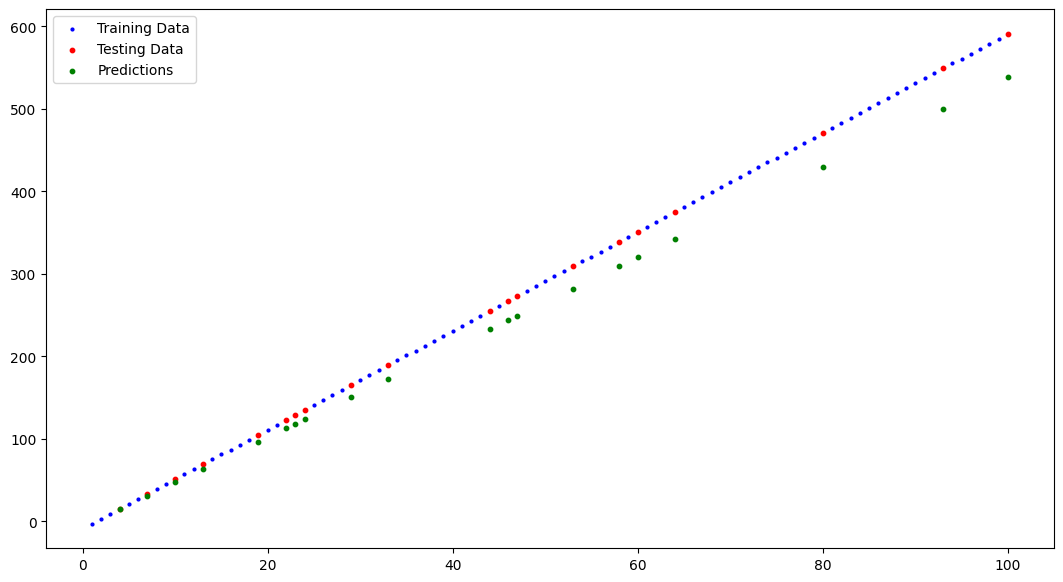

In [18]:
# Testing
with torch.no_grad():
  model_0.eval()
  y_pred = model_0(X_test)
print(model_0.state_dict())
plot_data(X_train, y_train, X_test, y_test, y_pred)

Text(0, 0.5, 'Cost')

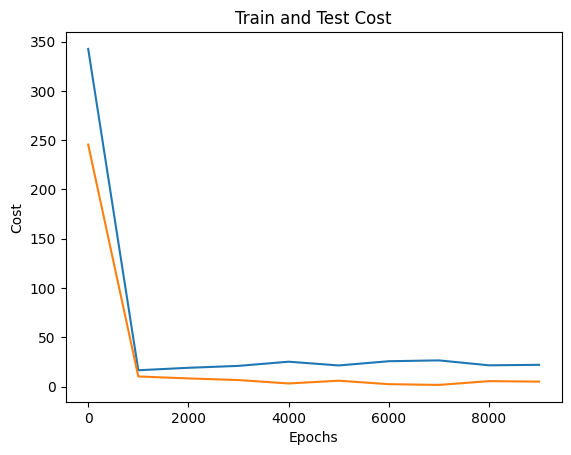

In [19]:
plt.plot(epoch_arr,np.array(torch.tensor(train_cost)), label="Train Loss")
plt.plot(epoch_arr,test_cost, label="Test Loss")
plt.title("Train and Test Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")

# Saving a Model
1. torch.save() - save a model
2. torch.load() - load a model
3. torch.nn.Module.load_state_dict() - allows to load models saved state dictionary

In [20]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_pytorch_workflow_model_0.pth"
model_save_path = model_path / model_name

print("saving model")
torch.save(obj=model_0.state_dict(), f=model_save_path)

saving model


# Loading Saved Model

In [21]:
loaded_model_0 = LinearRegresssionModel()
loaded_model_0.load_state_dict(torch.load(f=model_save_path))
loaded_model_0.state_dict()

OrderedDict([('wieghts', tensor([5.4592])), ('bias', tensor([-7.4839]))])

# Saving Model State + Optimizer state and other Details
torch.save({
    'epoch': epoch, \
    'model_state_dict': model.state_dict(),\
    'optimizer_state_dict': optimizer.state_dict(),\
    'loss': loss, \
    }, 'checkpoint.pth') \

# Loading Each
checkpoint = torch.load('checkpoint.pth')\
model.load_state_dict(checkpoint['model_state_dict'])\
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])\
epoch = checkpoint['epoch']\
loss = checkpoint['loss']\
model.eval()  # or model.train() if you need to continue training



# Linear V2

In [36]:
import torch
from torch import nn
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
next(model_1.parameters()).device

device(type='cpu')

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [56]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.01)

# Training

In [52]:
X_train.to(device); y_train.to(device); X_test.to(device); y_test.to(device);
X_train = X_train.type(torch.float32); y_train = y_train.type(torch.float32);X_test= X_test.type(torch.float32); y_test = y_test.type(torch.float32);
X_train.device, X_train.dtype

(device(type='cuda', index=0), torch.float32)

In [60]:
epochs = 2000
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%200==0:
    model_1.eval()
    print(list(model_1.parameters()))

[Parameter containing:
tensor([[5.5939]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.2197], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.4746]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.3159], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.4761]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.4065], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.5021]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.4880], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.4543]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.5657], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.5016]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-6.6430], device='cuda:0', requires_grad=True)]
[Parameter containing:
tensor([[5.4578]], device='cu

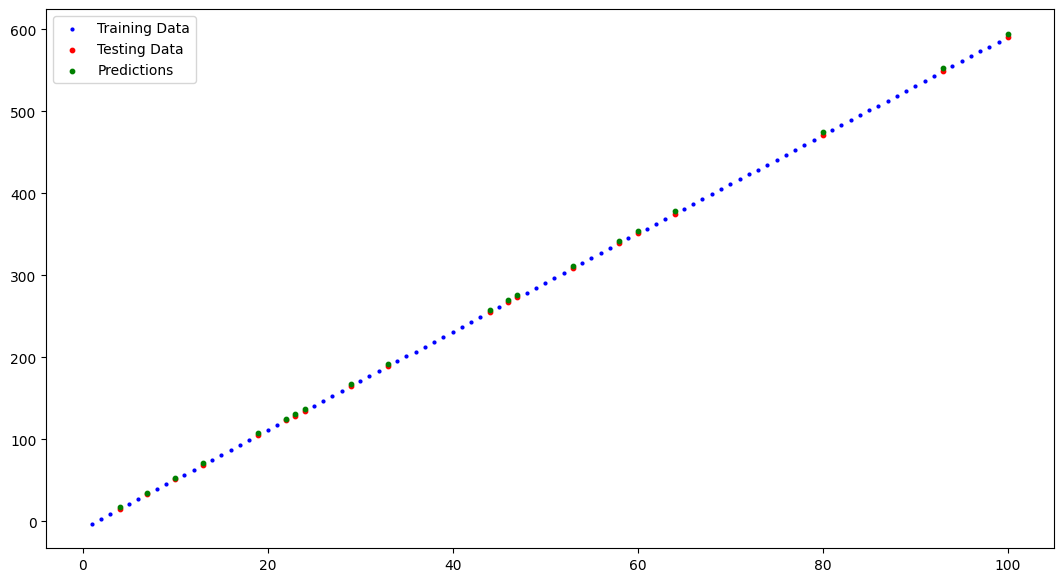

In [66]:
with torch.inference_mode():
  y_pred = model_1(X_test)

plot_data(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), y_pred.cpu())

# Saving the Model

In [67]:
from pathlib import Path
model_folder = Path("models")
model_folder.mkdir(parents=True, exist_ok=True)

model_name = "pytorch_linear_v2.pth"
path = model_folder / model_name

torch.save({
    "model_state_dict":model_1.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "loss":loss
},path)


# Loading the Model

In [70]:
loaded_model = LinearRegressionV2()
checkpont = torch.load(path)
loaded_model.load_state_dict(checkpont["model_state_dict"])
optimizer.load_state_dict(checkpont["optimizer_state_dict"])
y_pred = loaded_model(X_test.cpu())
loss_fn(y_pred.cpu(),y_test.cpu())

tensor(2.6270, grad_fn=<MeanBackward0>)